# Problem 2

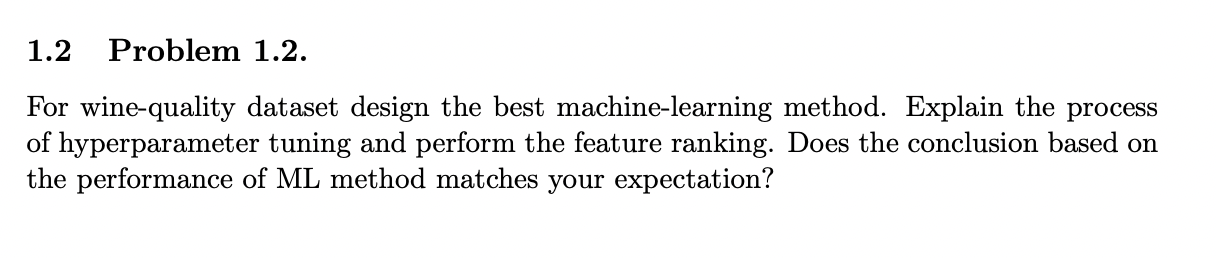

## data set

`Wine quality datasets` are generally considered for classification or regression tasks. Typically, the classes of wine are ordered and not balanced. Predicting wine quality in machine learning using wine quality datasets requires outlier detection algorithms to identify the high-quality and poor-quality wine.

## import necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from numba import jit

import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as tony

In [8]:
tony.sum([2,3,4,5])

14

In [9]:
#loading dataset
df = pd.read_csv('winequality-red.csv')

In [10]:
# number of rows & columns in the dataset
df.shape

(1599, 12)

In [15]:
#viewing first 5
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Here the dataset `wine-quality` has 12 columns, with 11 properties. 

The output variable is, therefore, the `quality column` rating of wine that is based on sensory data and scores from 0 to 10. Hence, these features are crucial for getting the most accurate and reliable predictions of the wine quality

## Analyzing and processing wine data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
## checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# some statistical visualization
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
len(df)

1599

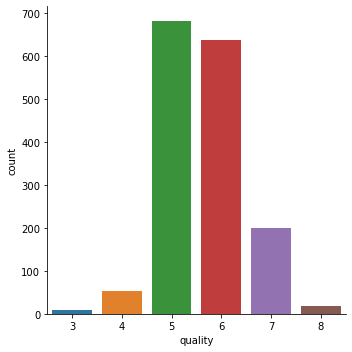

In [59]:
sns.catplot(x='quality', data = df, kind = 'count')
plt.show()

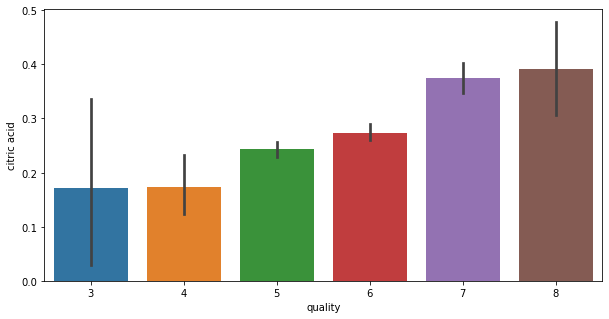

In [17]:
# citric acid vs Quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y = 'citric acid', data = df)
plt.show()

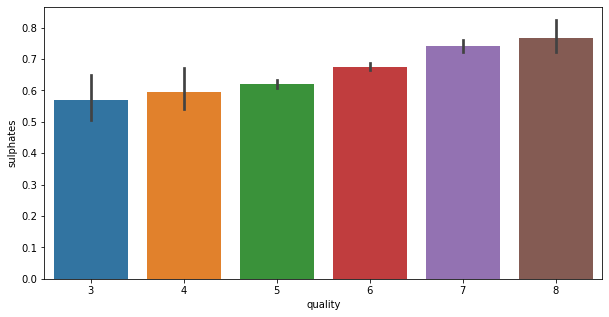

In [18]:
# sulphates vs Quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y = 'sulphates', data = df)
plt.show()

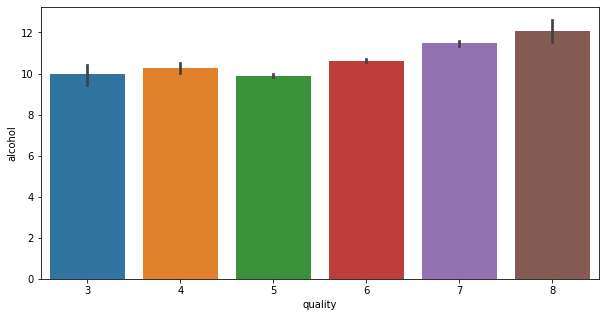

In [19]:
# alcohol vs Quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y = 'alcohol', data = df)
plt.show()

### checking for Correlation in the dataset

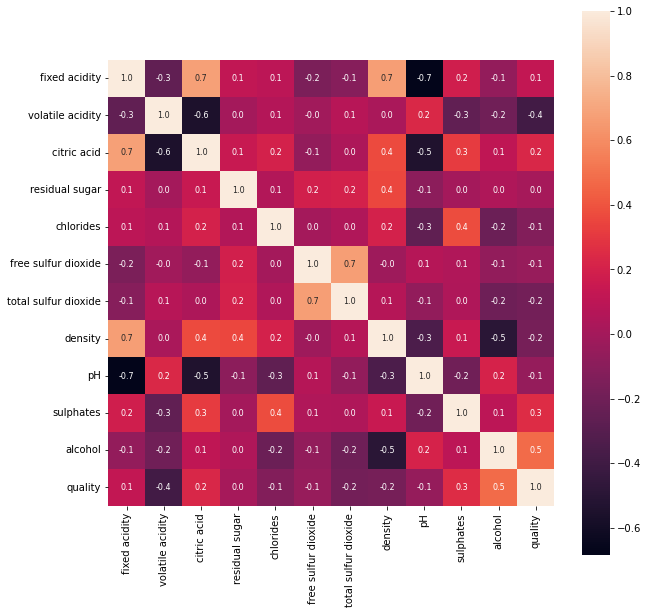

In [20]:
cor = df.corr()

# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(cor, cbar=True, square=True,
            fmt = '.1f', annot = True,
            annot_kws={'size':8}, cmap = None)
plt.show()

**Comment:** some columns are slightly correlated e.g the `fixed acidity and PH`, `fixed acidity and density`. Although we will compute our model for all dataset columns

## Data Pre-processing

In [21]:
# separate the data and Label
X = df.drop('quality',axis=1).values

# here we set limit for wine quality prediction 1 if quality > or = 7 otherwise 0
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0).values


In [22]:
# splitting our data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [23]:
X_train.shape

(1279, 11)

# part_A Model construction

## 1. decision tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=6)

# fitting into data
model_tree.fit(X_train, Y_train)

# test data accuracy
acc = model_tree.score(X_test, Y_test)
print('Accuracy of Decision Tree:', acc)


Accuracy of Decision Tree: 0.928125


In [100]:
# predicting the model
#pred_tree =  model_tree.predict(X_test)
#print(pred_tree)

# 2. Support Vector Machine

In [129]:
from sklearn.svm import SVC

model  = SVC()
model.fit(X_train, Y_train)
# test data accuracy
acc = model.score(X_test, Y_test)
print('Accuracy of SVM:', acc)

Accuracy of SVM: 0.884375


# Logistic regression

In [124]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
# test data accuracy
acc = model2.score(X_test, Y_test)
print('Accuracy of Logistic Regression:', acc)


Accuracy of Logistic Regression: 0.896875


# Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=77)
model_forest.fit(X_train, Y_train)
# test data accuracy
acc = model_forest.score(X_test, Y_test)
print('Accuracy of Random Forest:', acc)


Accuracy of Random Forest: 0.9375


## Conclusion before hyper parameter turning

Based on the current research shown above, We tested for **Decision tree, support vector machine, logistic regression and Random forest** the most effective Machine Learning methods for `wine quality analysis` are Support Vector Machine (SVM), and Random Forest. While, Random forest gave the higher performance of 0.9375

# part_B Hyper parameter tuning

## 1b Decision tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

# fitting into data
model_tree.fit(X_train, Y_train)

# test data accuracy
acc = model_tree.score(X_test, Y_test)
#print('Accuracy of Decision Tree:', acc)

#Dtree= DecisionTreeRegressor()
parameter_space = {'max_features': ['auto', 'sqrt', 'log2'], 
                   'ccp_alpha': np.arange(0, 1, 0.001).tolist()}

clf_tree = GridSearchCV(model_tree, parameter_space,cv=2)
clf=clf_tree.fit(X_train, Y_train)

#clf.score(X_test, Y_test)
clf.best_params_

{'ccp_alpha': 0.014, 'max_features': 'log2'}

In [146]:
clf.best_score_

0.8756895539906103

## 2b. Gridsearchcv for Random forest

In [149]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
#define grid search
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [150]:
#best param
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [151]:
clf.best_score_

0.8756895539906103

## final model to use

In [157]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto',
                            n_estimators= 500, max_depth=8, criterion='gini')

In [158]:
rfc1.fit(X_train, Y_train)
#accuracy score after hyper parameter
acc2 = rfc1.score(X_test, Y_test)
print('Accuracy after hyper parameter ', acc2)

Accuracy after hyper parameter  0.93125


## Final Conclusion

Based on the current research shown above, We tested for **Decision tree, support vector machine, logistic regression and Random forest** the most effective Machine Learning methods for `wine quality analysis`  are Support Vector Machine (SVM), and Random Forest. While, Random forest gave the higher performance of 0.9375

Furthermore, after performing **Gridsearch** we got the best hyper parameter of `Random Forest` as 0.93125

Hence from this anaysis, Random forest is the best model for predicting the wine quality data sets